<a href="https://colab.research.google.com/github/BahodirML/Coding_Practices/blob/main/COMPANY_ACQUISITION_12_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#labelling
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('/content/companies.csv')
df.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


In [3]:
df.shape

(196553, 44)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196553 entries, 0 to 196552
Data columns (total 44 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   196553 non-null  object 
 1   Unnamed: 0.1         196553 non-null  int64  
 2   entity_type          196553 non-null  object 
 3   entity_id            196553 non-null  int64  
 4   parent_id            0 non-null       float64
 5   name                 196531 non-null  object 
 6   normalized_name      196527 non-null  object 
 7   permalink            196553 non-null  object 
 8   category_code        123186 non-null  object 
 9   status               196553 non-null  object 
 10  founded_at           91227 non-null   object 
 11  closed_at            2620 non-null    object 
 12  domain               126545 non-null  object 
 13  homepage_url         126545 non-null  object 
 14  twitter_username     80591 non-null   object 
 15  logo_url         

In [5]:
df.dtypes

id                      object
Unnamed: 0.1             int64
entity_type             object
entity_id                int64
parent_id              float64
name                    object
normalized_name         object
permalink               object
category_code           object
status                  object
founded_at              object
closed_at               object
domain                  object
homepage_url            object
twitter_username        object
logo_url                object
logo_width             float64
logo_height            float64
short_description       object
description             object
overview                object
tag_list                object
country_code            object
state_code              object
city                    object
region                  object
first_investment_at     object
last_investment_at      object
investment_rounds      float64
invested_companies     float64
first_funding_at        object
last_funding_at         object
funding_

In [6]:
df.describe()

,Unnamed: 0.1,entity_id,parent_id,logo_width,logo_height,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,ROI
count,196553.000000,196553.000000,0.0,110110.000000,110110.000000,2591.000000,2591.000000,31707.000000,2.787400e+04,91699.000000,129667.000000,83852.000000,83852.000000,726.000000
mean,98276.000000,153006.227333,NaN,459.132685,222.728917,2.372057,2.204940,1.659760,1.481652e+07,1.199402,2.852067,37.564512,-52.123066,45.745037
std,56740.108067,90209.250941,NaN,594.982577,333.090722,12.173510,11.436955,1.201666,6.775937e+07,0.540099,9.100309,15.477102,70.049067,572.035638
min,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,2.910000e+02,1.000000,1.000000,-50.942326,-159.497746,0.011111
25%,49138.000000,59850.000000,NaN,192.000000,70.000000,1.000000,1.000000,1.000000,5.000000e+05,1.000000,1.000000,34.052234,-111.940005,2.648879
50%,98276.000000,174539.000000,NaN,267.000000,105.000000,1.000000,1.000000,1.000000,2.564500e+06,1.000000,1.000000,39.768403,-77.036871,6.500497
75%,147414.000000,232655.000000,NaN,484.000000,232.000000,1.000000,1.000000,2.000000,1.100000e+07,1.000000,3.000000,45.421530,-0.127758,13.549900
max,196552.000000,286215.000000,NaN,18200.000000,9600.000000,478.000000,459.000000,15.000000,5.700000e+09,9.000000,1189.000000,77.553604,176.212549,13333.333333


In [7]:
df.isnull().sum()

id                          0
Unnamed: 0.1                0
entity_type                 0
entity_id                   0
parent_id              196553
name                       22
normalized_name            26
permalink                   0
category_code           73367
status                      0
founded_at             105326
closed_at              193933
domain                  70008
homepage_url            70008
twitter_username       115962
logo_url                86443
logo_width              86443
logo_height             86443
short_description      189422
description            104505
overview                69582
tag_list               115101
country_code           108563
state_code             145650
city                   112663
region                      0
first_investment_at    193970
last_investment_at     193970
investment_rounds      193962
invested_companies     193962
first_funding_at       165046
last_funding_at        165046
funding_rounds         164846
funding_to

In [8]:
# Dropping unnecessary columns
df.drop(['Unnamed: 0.1','entity_type','entity_id','parent_id','twitter_username','logo_url','short_description','description',
        'first_investment_at','closed_at','last_investment_at','investment_rounds','invested_companies'],axis=1,inplace=True)

In [9]:
# Filling the missing values of datetime type columns using ffill
date_columns = ['founded_at','first_funding_at','last_funding_at','first_milestone_at','last_milestone_at']

for i in date_columns:
    df[i].fillna(method='ffill',inplace = True)

In [10]:
# Filling the missing values in categorical columns with the value: 'Unavailable'
cat_columns = ['domain','homepage_url','overview','tag_list','name','normalized_name']

for x in cat_columns:
    df[x].fillna('Unavailable',inplace = True)

In [11]:
# Filling the missing values in the categorical columns with their respective mode values
cat_columns2 = ['category_code','country_code','state_code','city','created_by']

for i in cat_columns2:
    mode_val = df[i].mode()[0]
    df[i].fillna(mode_val,inplace = True)

In [12]:
# Filling the missing values in the latitude and longitude columns
df['lng'] = df['lng'].interpolate(method='linear')
df['lat'] = df['lat'].interpolate(method ='linear')

In [13]:
# Filling the missing values in numeric columns with their respective mean values
num_columns = ['logo_width','logo_height','funding_rounds','funding_total_usd','milestones','relationships','ROI']

for i in num_columns:
    df[i].fillna(df[i].mean(),inplace = True)

In [14]:
df.isnull().sum()

id                    0
name                  0
normalized_name       0
permalink             0
category_code         0
status                0
founded_at            0
domain                0
homepage_url          0
logo_width            0
logo_height           0
overview              0
tag_list              0
country_code          0
state_code            0
city                  0
region                0
first_funding_at      0
last_funding_at       0
funding_rounds        0
funding_total_usd     0
first_milestone_at    0
last_milestone_at     0
milestones            0
relationships         0
created_by            0
created_at            0
updated_at            0
lat                   0
lng                   0
ROI                   0
dtype: int64

In [15]:
# Changing the datatype of date columns from object to datetime type

df['founded_at'] = pd.to_datetime(df['founded_at'])
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'])
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'])
df['first_milestone_at'] = pd.to_datetime(df['first_milestone_at'])
df['last_milestone_at'] = pd.to_datetime(df['last_milestone_at'])
df['created_at'] = pd.to_datetime(df['created_at'])
df['updated_at'] = pd.to_datetime(df['updated_at'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196553 entries, 0 to 196552
Data columns (total 31 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  196553 non-null  object        
 1   name                196553 non-null  object        
 2   normalized_name     196553 non-null  object        
 3   permalink           196553 non-null  object        
 4   category_code       196553 non-null  object        
 5   status              196553 non-null  object        
 6   founded_at          196553 non-null  datetime64[ns]
 7   domain              196553 non-null  object        
 8   homepage_url        196553 non-null  object        
 9   logo_width          196553 non-null  float64       
 10  logo_height         196553 non-null  float64       
 11  overview            196553 non-null  object        
 12  tag_list            196553 non-null  object        
 13  country_code        196553 no

In [17]:
for col in df.columns:
    if df[col].dtype == 'datetime64[ns]':
        df[f'{col}_Day'] = df[col].dt.day
        df[f'{col}_Month'] = df[col].dt.month
        df[f'{col}_Year'] = df[col].dt.year

In [18]:
df.head(10)

,id,name,normalized_name,permalink,category_code,status,founded_at,domain,homepage_url,logo_width,...,first_milestone_at_Year,last_milestone_at_Day,last_milestone_at_Month,last_milestone_at_Year,created_at_Day,created_at_Month,created_at_Year,updated_at_Day,updated_at_Month,updated_at_Year
0,c:1,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,wetpaint-inc.com,http://wetpaint-inc.com,401.000000,...,2010,18,9,2013,25,5,2007,13,4,2013
1,c:10,Flektor,flektor,/company/flektor,games_video,acquired,2005-10-17,flektor.com,http://www.flektor.com,186.000000,...,2010,18,9,2013,31,5,2007,23,5,2008
2,c:100,There,there,/company/there,games_video,acquired,2005-10-17,there.com,http://www.there.com,107.000000,...,2003,23,9,2011,6,8,2007,4,11,2013
3,c:10000,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,mywebbo.com,http://www.mywebbo.com,459.132685,...,2003,23,9,2011,24,8,2008,6,9,2008
4,c:10001,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,themoviestreamer.com,http://themoviestreamer.com,200.000000,...,2003,23,9,2011,24,8,2008,6,9,2008
5,c:10002,Synergie Media,synergie media,/company/synergie-media,advertising,operating,2007-06-27,synergie-media.com,http://www.synergie-media.com,284.000000,...,2003,23,9,2011,24,8,2008,6,9,2008
6,c:10003,Green Basti Ecosystems,green basti ecosystems,/company/green-basti-ecosystems,cleantech,operating,2008-08-20,Unavailable,Unavailable,459.132685,...,2003,23,9,2011,24,8,2008,22,4,2010
7,c:100042,HostNine,hostnine,/company/hostnine,software,operating,2008-08-20,hostnine.com,http://www.hostnine.com,187.000000,...,2011,20,6,2011,7,9,2011,20,12,2011
8,c:10005,Thomas Publishing,thomas publishing,/company/thomas-publishing,advertising,operating,2008-08-20,thomaspublishing.com,http://www.thomaspublishing.com,276.000000,...,1999,1,6,1999,24,8,2008,19,11,2009
9,c:100062,Vetter Idea Management System,vetter idea management system,/company/vetter-idea-management-system,enterprise,operating,2011-08-01,getvetter.com,http://www.getvetter.com,200.000000,...,2011,1,8,2011,7,9,2011,24,9,2011


In [19]:
# Stats of numeric columns
numeric_columns = ['logo_width','logo_height','funding_rounds','funding_total_usd','milestones','relationships','lat','lng','ROI']
num_col_df = df[numeric_columns]
num_col_df.describe()

,logo_width,logo_height,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,ROI
count,196553.000000,196553.000000,196553.000000,1.965530e+05,196553.000000,196553.000000,196553.000000,196553.000000,196553.000000
mean,459.132685,222.728917,1.659760,1.481652e+07,1.199402,2.852067,37.437087,-51.428830,45.745037
std,445.324843,249.307424,0.482632,2.551658e+07,0.368905,7.391464,13.570808,62.255161,34.741883
min,1.000000,1.000000,1.000000,2.910000e+02,1.000000,1.000000,-50.942326,-159.497746,0.011111
25%,250.000000,97.000000,1.659760,1.481652e+07,1.000000,1.000000,34.170561,-97.743061,45.745037
50%,459.132685,222.728917,1.659760,1.481652e+07,1.199402,2.852067,39.364283,-74.005973,45.745037
75%,459.132685,222.728917,1.659760,1.481652e+07,1.199402,2.852067,44.137870,-1.890401,45.745037
max,18200.000000,9600.000000,15.000000,5.700000e+09,9.000000,1189.000000,77.553604,176.212549,13333.333333


In [20]:
# Identifying outliers in numeric columns and imputing them with their median value
columns_with_outliers = ['logo_width','logo_height','relationships','ROI']

for i in columns_with_outliers:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[i] < (Q1 - 1.5 * IQR)) | (df[i] > (Q3 + 1.5 * IQR)))
    median = df[i].median()
    df.loc[outliers, i] = median

<Axes: xlabel='logo_width'>

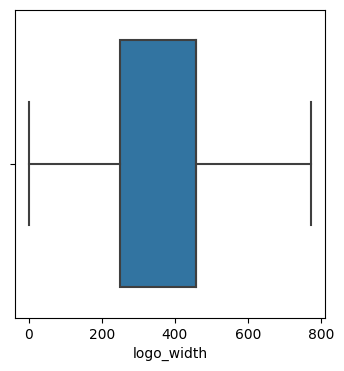

In [21]:
# Plotting the boxplot of logo_width variable
plt.figure(figsize=(4,4))
sns.boxplot(x="logo_width",data = df)

<Axes: xlabel='logo_height'>

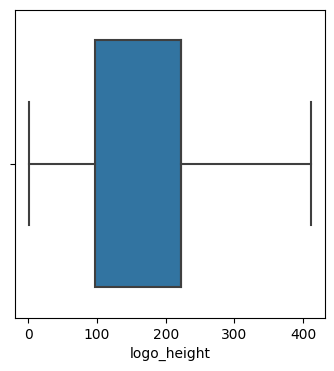

In [22]:
# Plotting the boxplot of logo_height variable
plt.figure(figsize=(4,4))
sns.boxplot(x="logo_height",data = df)

<Axes: xlabel='relationships'>

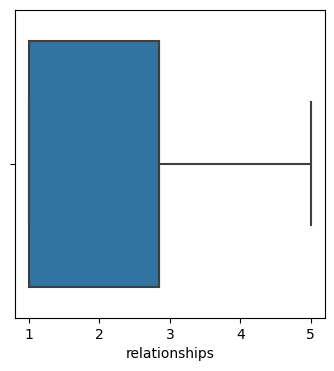

In [23]:
# Plotting the boxplot of relationships variable
plt.figure(figsize=(4,4))
sns.boxplot(x="relationships",data = df)

<Axes: xlabel='ROI'>

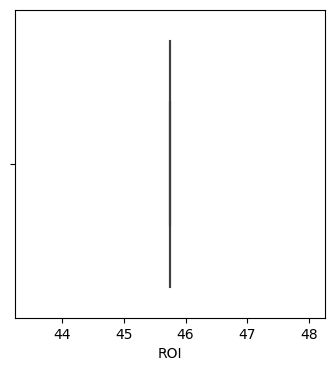

In [24]:
# Plotting the boxplot of ROI variable
plt.figure(figsize=(4,4))
sns.boxplot(x="ROI",data = df)

In [25]:
le = LabelEncoder()
# Transforming qualitative data into quantitative data
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [26]:
df.head()

,id,name,normalized_name,permalink,category_code,status,founded_at,domain,homepage_url,logo_width,...,first_milestone_at_Year,last_milestone_at_Day,last_milestone_at_Month,last_milestone_at_Year,created_at_Day,created_at_Month,created_at_Year,updated_at_Day,updated_at_Month,updated_at_Year
0,0,177738,188082,189098,41,3,2005-10-17,120718,30317,401.000000,...,2010,18,9,2013,25,5,2007,13,4,2013
1,1,58822,61965,62340,12,0,2005-10-17,40243,62354,186.000000,...,2010,18,9,2013,31,5,2007,23,5,2008
2,2,161743,170854,171780,12,0,2005-10-17,109492,112129,107.000000,...,2003,23,9,2011,6,8,2007,4,11,2013
3,3,95656,113905,114553,25,3,2008-07-26,74284,86928,459.132685,...,2003,23,9,2011,24,8,2008,6,9,2008
4,4,154931,169502,170425,12,3,2008-07-26,109272,27343,200.000000,...,2003,23,9,2011,24,8,2008,6,9,2008


In [27]:
df.isnull().sum()

id                          0
name                        0
normalized_name             0
permalink                   0
category_code               0
status                      0
founded_at                  0
domain                      0
homepage_url                0
logo_width                  0
logo_height                 0
overview                    0
tag_list                    0
country_code                0
state_code                  0
city                        0
region                      0
first_funding_at            0
last_funding_at             0
funding_rounds              0
funding_total_usd           0
first_milestone_at          0
last_milestone_at           0
milestones                  0
relationships               0
created_by                  0
created_at                  0
updated_at                  0
lat                         0
lng                         0
ROI                         0
founded_at_Day              0
founded_at_Month            0
founded_at

In [37]:
cat = df.select_dtypes('object').columns.to_list()
cat

[]

ValueError: ignored

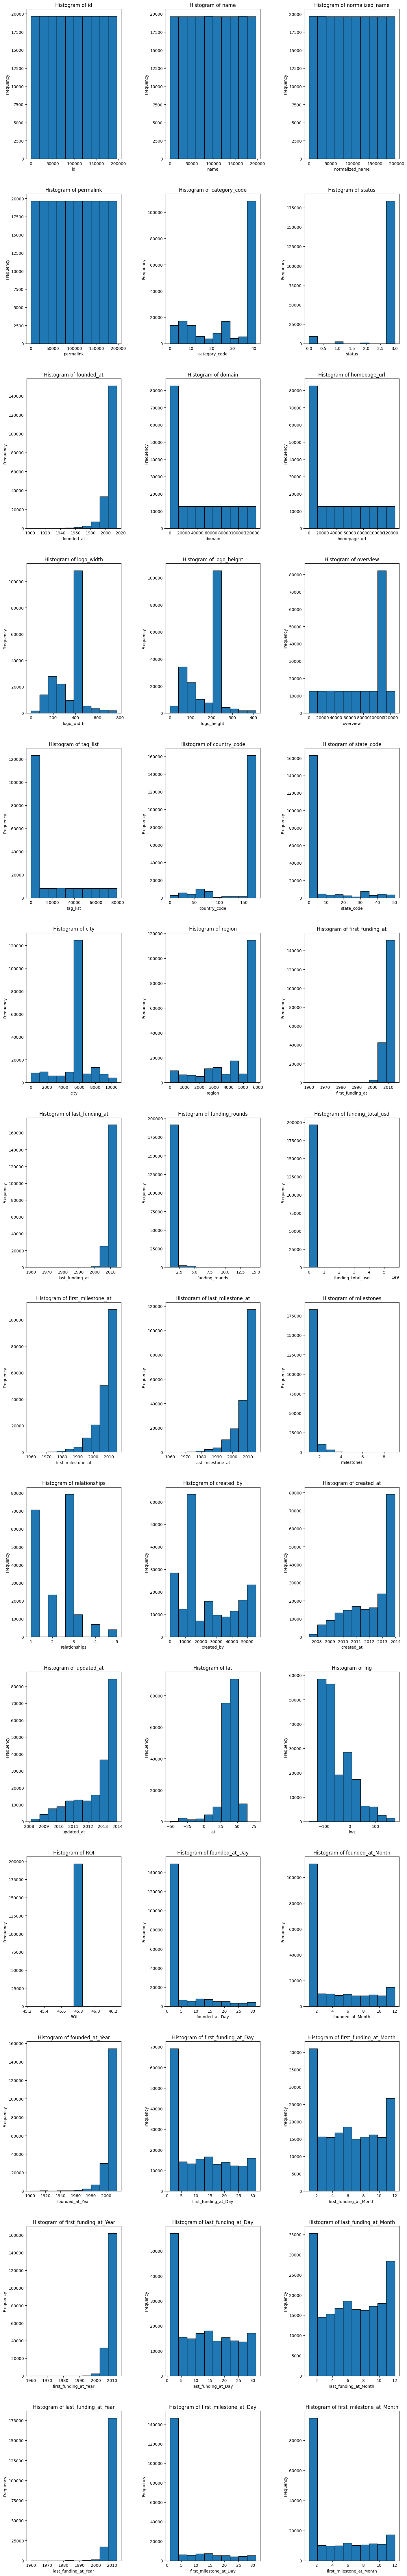

In [33]:
plt.figure(figsize=[15, 90])
for idx,column in enumerate(df,start=1):
  plt.subplot(14,3,idx)
  plt.hist(df[column], bins=10, edgecolor='black')
  plt.xlabel(f'{column}')
  plt.ylabel('Frequency')
  plt.title(f'Histogram of {column}')
  plt.tight_layout(pad=4)
plt.show()

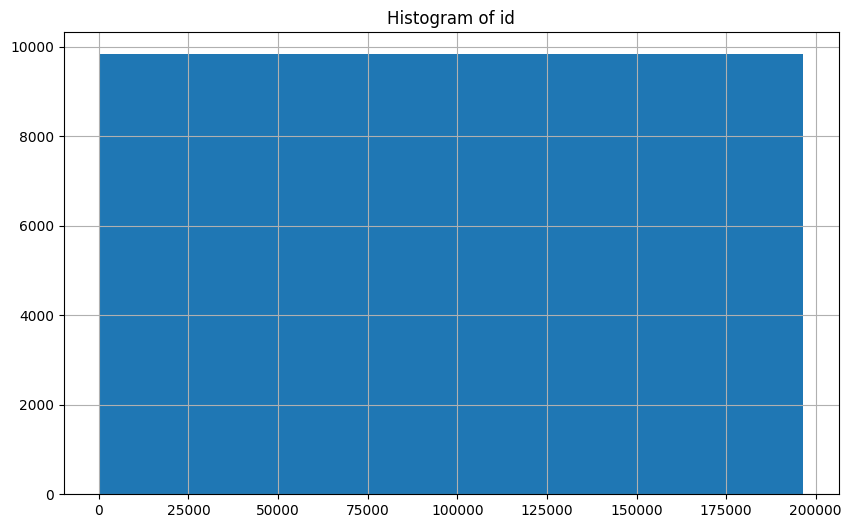

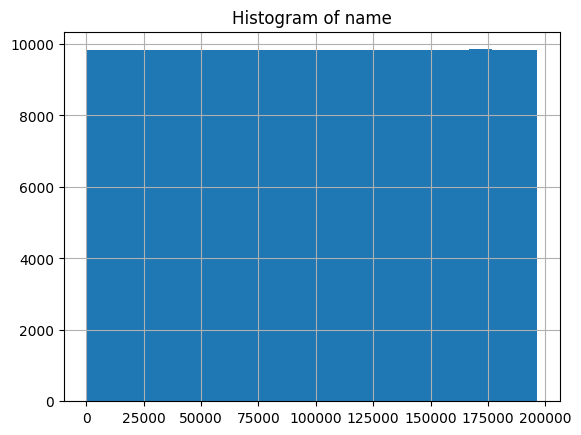

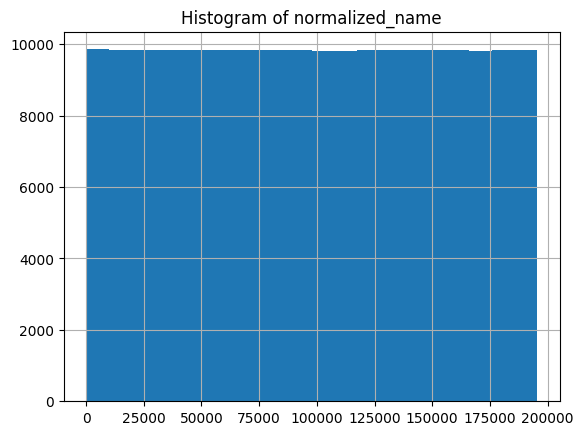

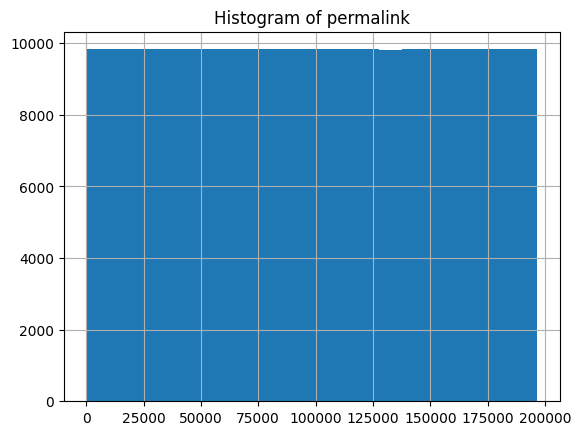

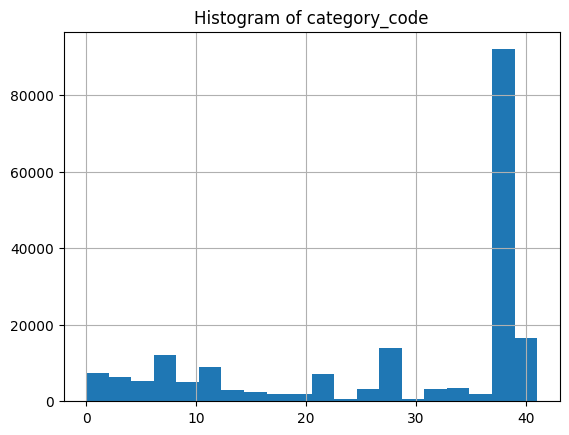

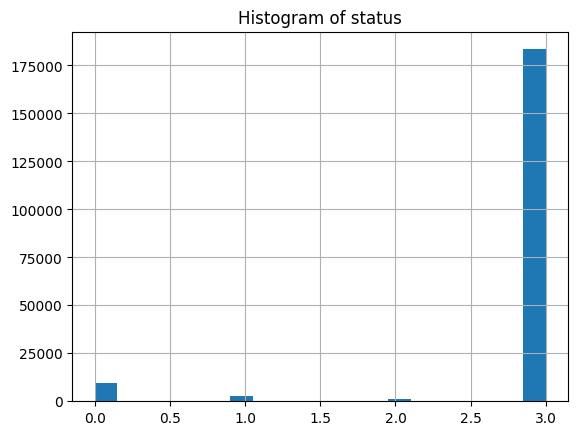

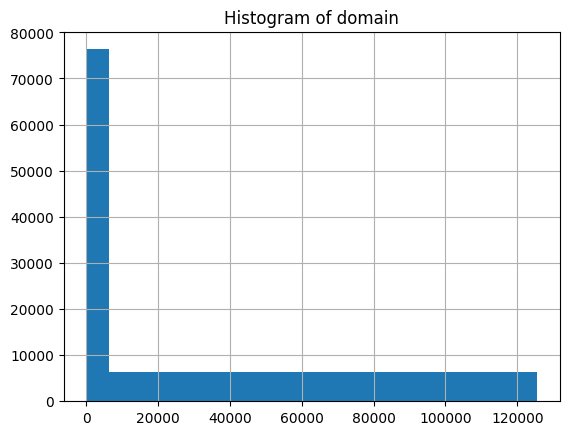

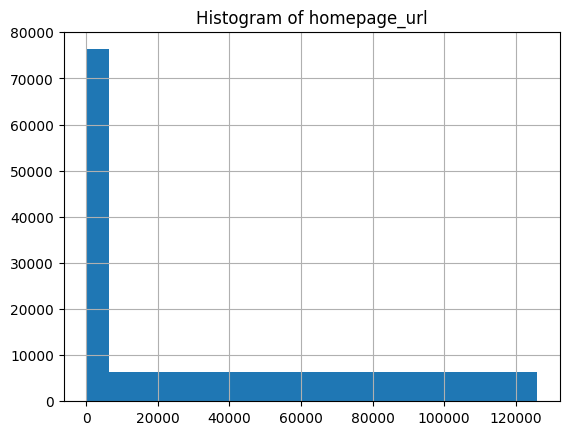

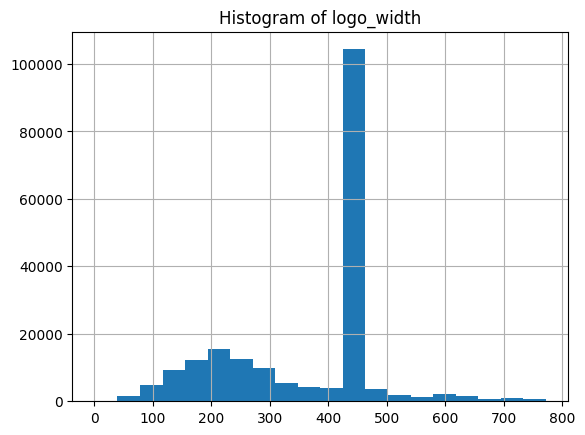

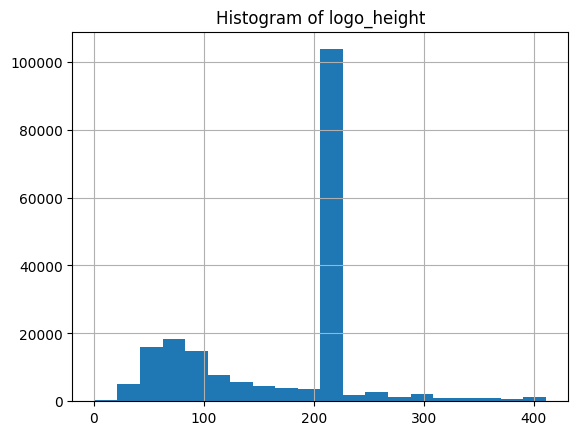

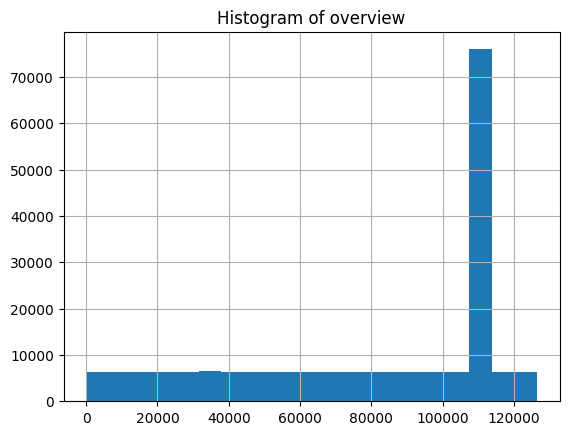

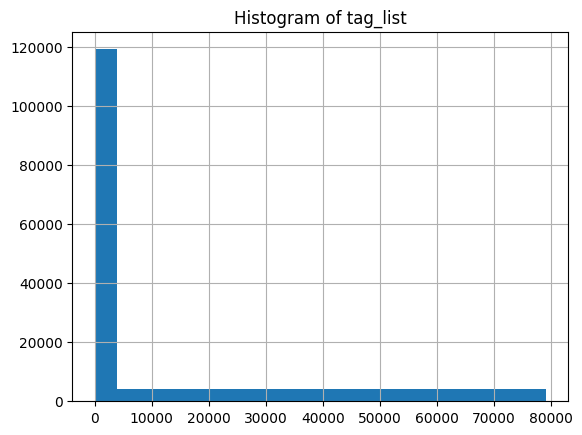

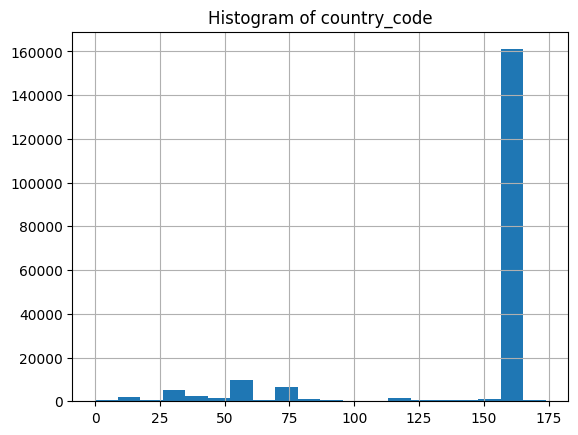

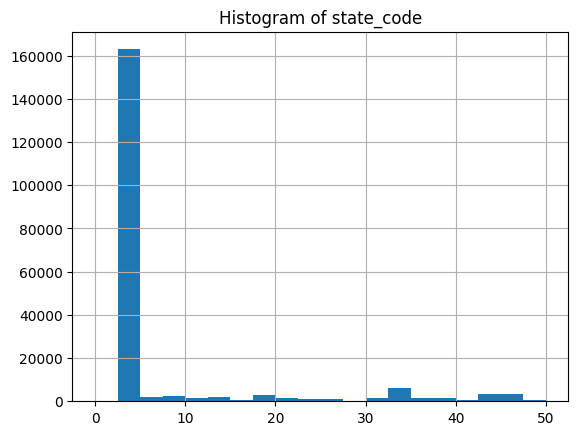

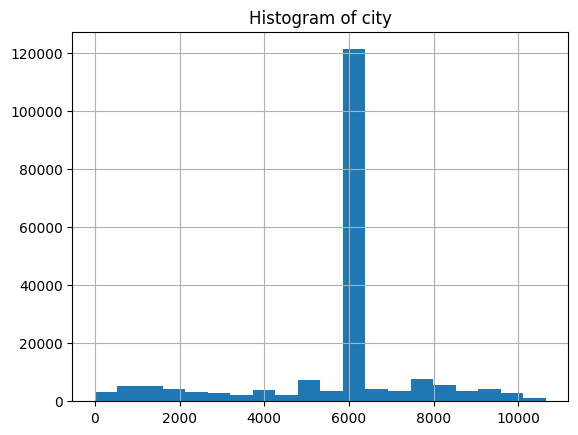

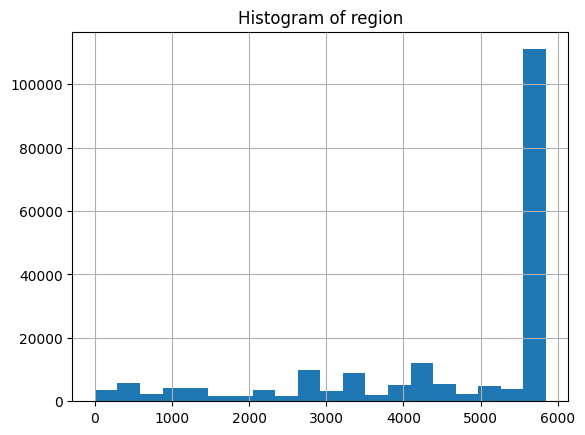

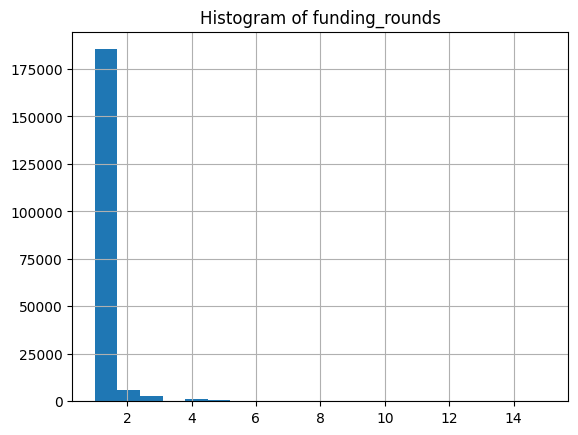

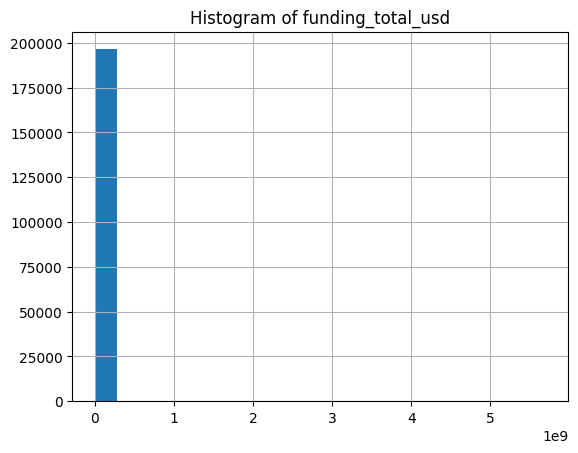

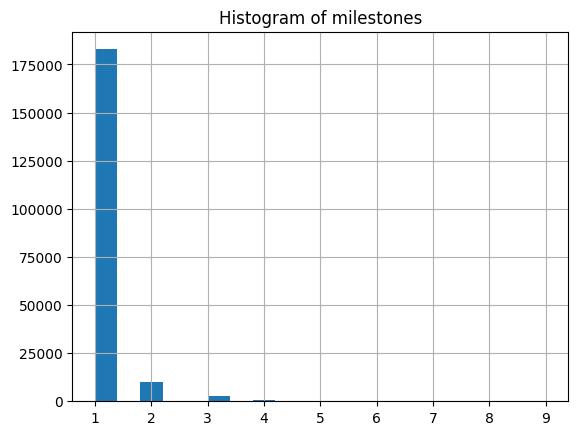

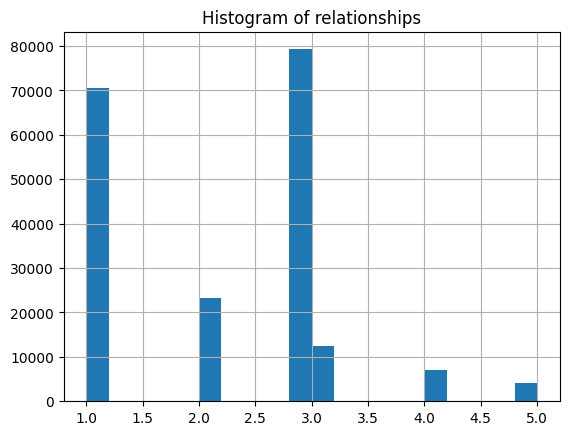

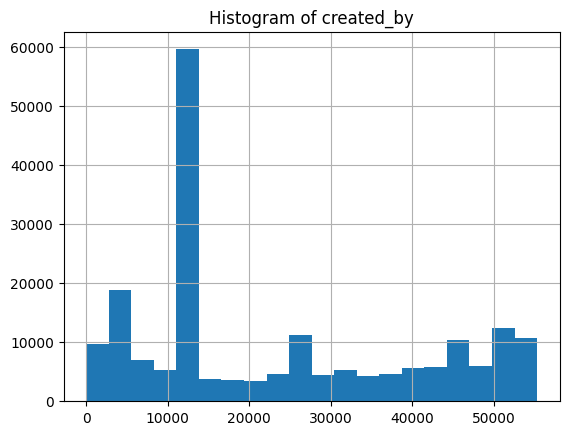

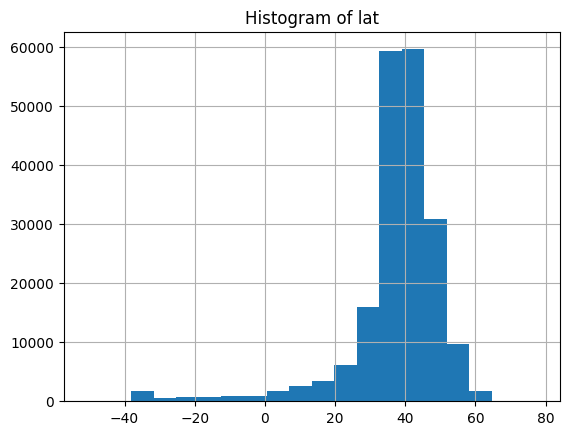

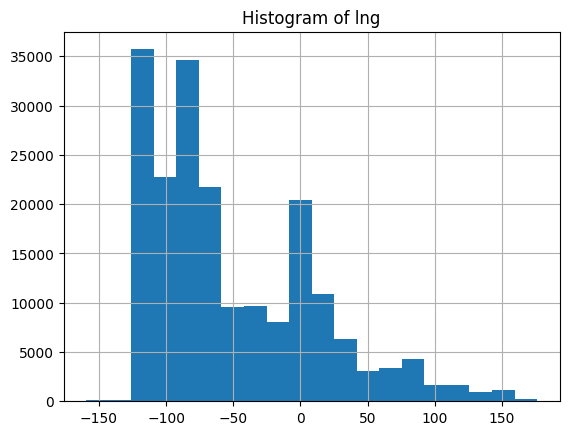

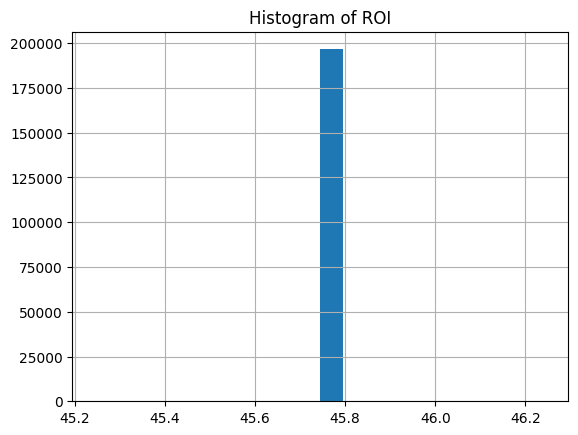

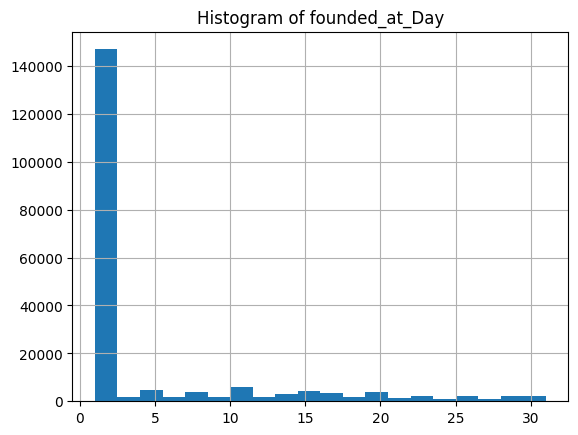

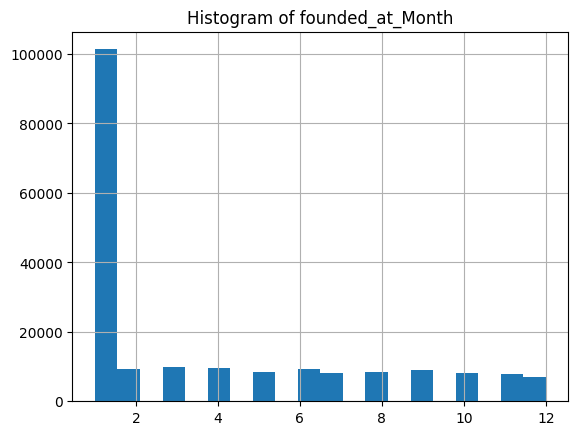

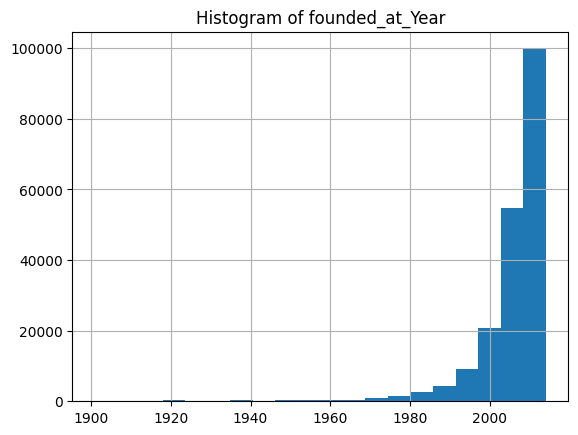

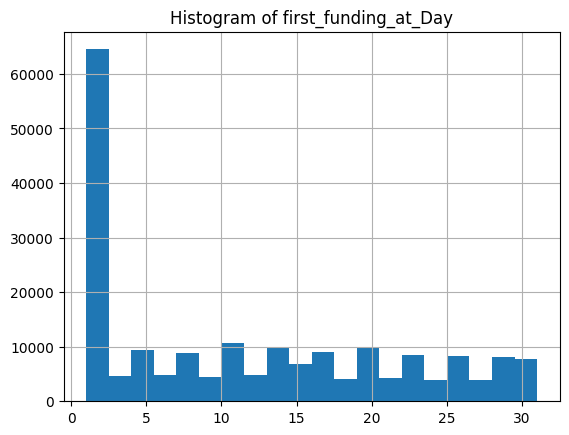

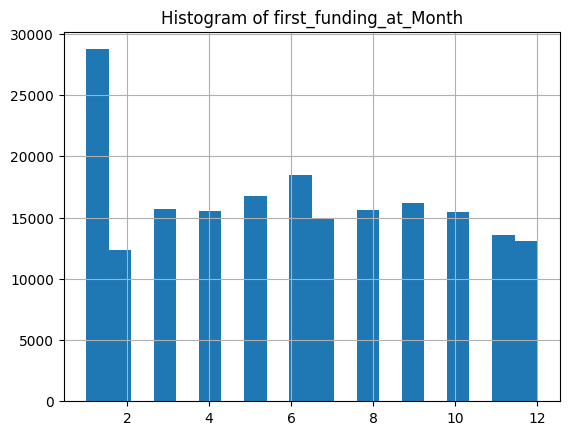

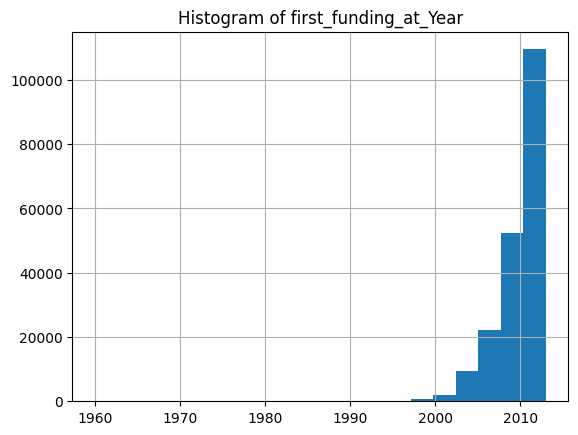

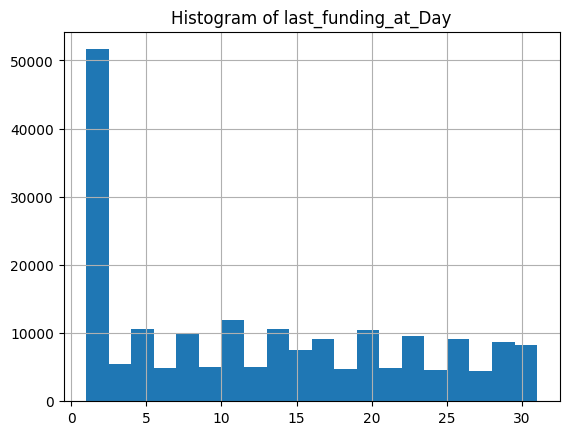

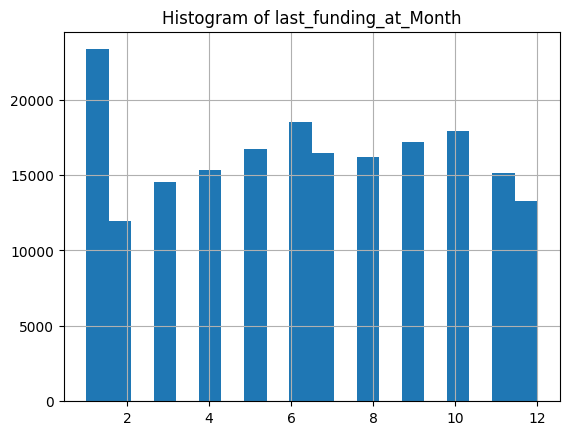

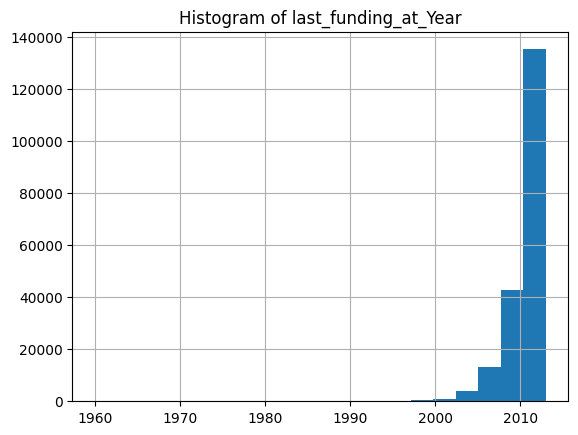

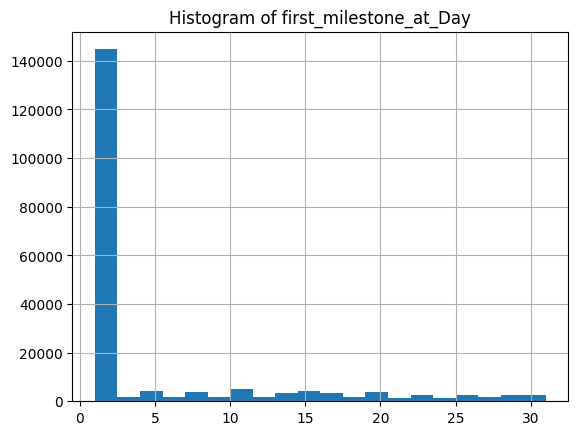

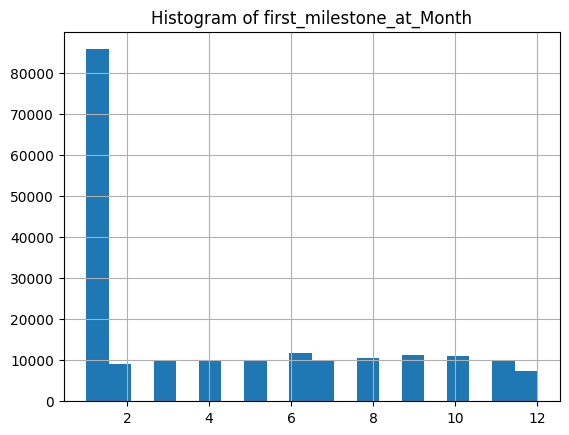

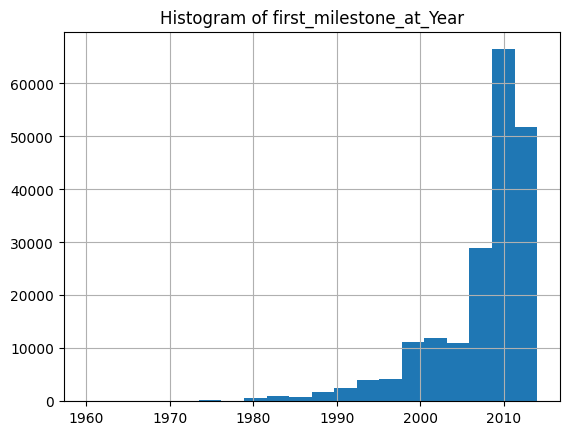

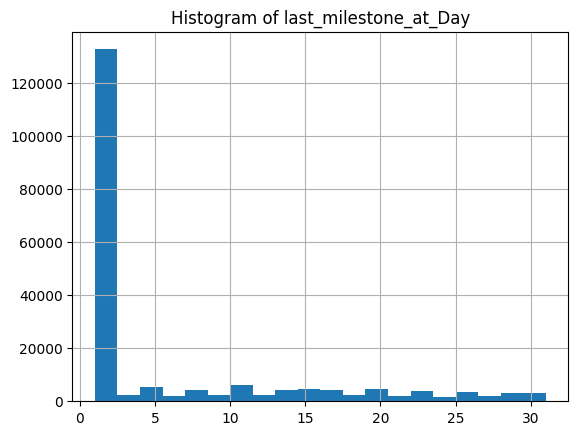

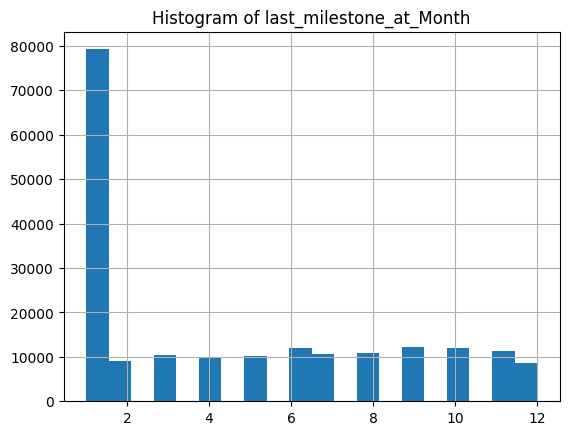

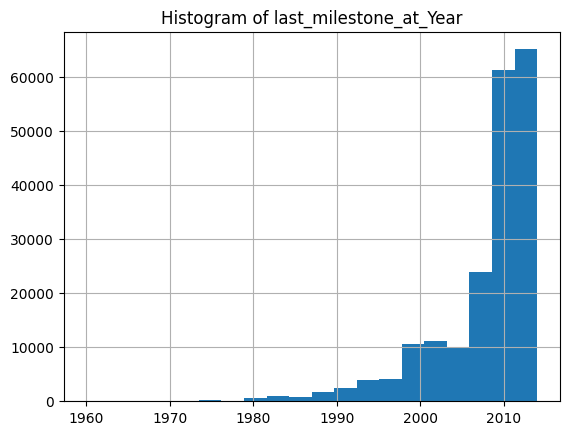

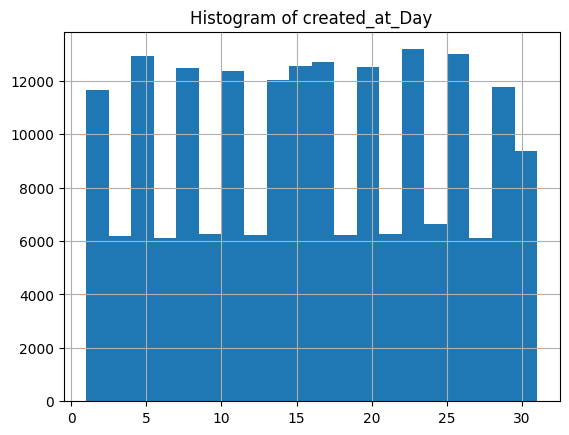

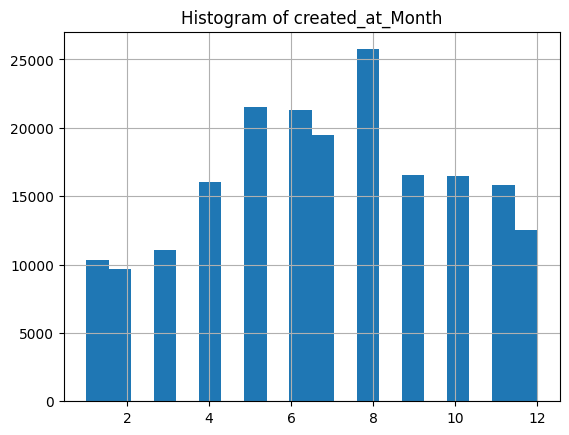

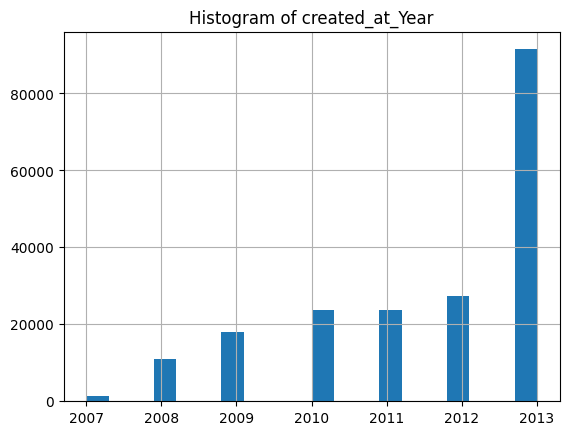

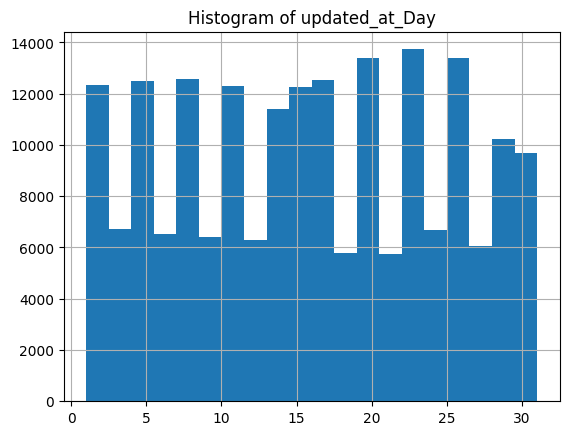

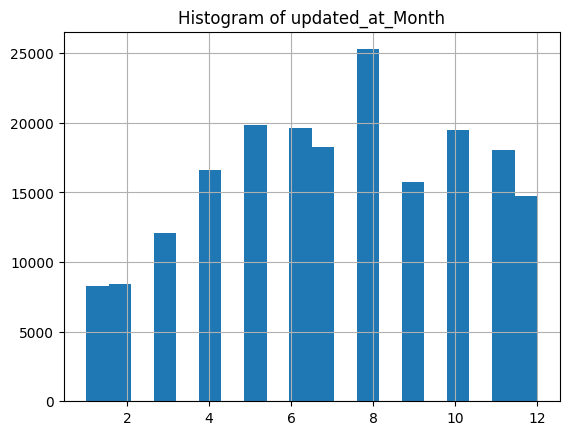

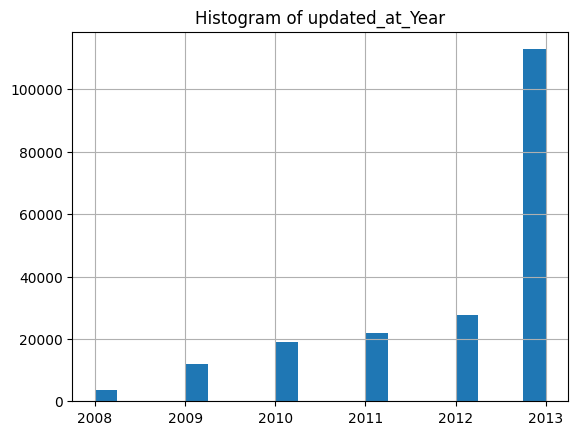

In [34]:
# Histograms for numerical features
plt.figure(figsize=(10, 6))
for column in df.select_dtypes(include=[np.number]):
    df[column].hist(bins=20)
    plt.title(f'Histogram of {column}')
    plt.show()

##Modelling
